In [192]:
import sys
sys.path.append('../')  # Ajuste o caminho conforme a necessidade
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations
from utils.result_visualizer import ResultsVisualizer

In [193]:
# Instanciando a ExperimentManager
db_path = '../dbs/dadosartigo2.db'  # Ajuste o caminho para o seu banco de dados
project_name = 'Artigo'
experiment_name = "Argmax"
visualizer =  ResultsVisualizer(db_path, project_name, experiment_name)


In [194]:
visualizer.results.head()

,Experimento,Projeto,ID,Acuracia,F1ScoreMacro,method,ngram_range,norm,Parameters_Str,Parameters_Label
0,Argmax,Artigo,1,0.753033,0.589002,binary,"[1, 1]",None,"binary, [1, 1], None","binary-[1, 1]-None"
1,Argmax,Artigo,1,0.753193,0.578481,binary,"[1, 1]",None,"binary, [1, 1], None","binary-[1, 1]-None"
2,Argmax,Artigo,1,0.749322,0.596320,binary,"[1, 1]",None,"binary, [1, 1], None","binary-[1, 1]-None"
3,Argmax,Artigo,1,0.755947,0.623983,binary,"[1, 1]",None,"binary, [1, 1], None","binary-[1, 1]-None"
4,Argmax,Artigo,1,0.747326,0.556651,binary,"[1, 1]",None,"binary, [1, 1], None","binary-[1, 1]-None"


In [195]:
# Gera estatísticas com um exemplo de filtros e métricas
filters = {'Parameters_Label': []}
metrics = []
stats_df = visualizer.generate_statistics(filters=filters, metrics=metrics)
display(stats_df)

,Experimento,Projeto,Parameters_Label,Acuracia mean,Acuracia std,F1ScoreMacro mean,F1ScoreMacro std,Acuracia cv,F1ScoreMacro cv
0,Argmax,Artigo,"binary-[1, 1]-None",0.753092,0.003339,0.587712,0.018489,0.443435,3.145849
1,Argmax,Artigo,"binary-[1, 1]-l2",0.190686,0.004569,0.253889,0.005175,2.396068,2.038462
2,Argmax,Artigo,"binary-[1, 2]-None",0.895577,0.001862,0.700921,0.013354,0.207912,1.905186
3,Argmax,Artigo,"binary-[1, 2]-l2",0.313024,0.004631,0.338196,0.005975,1.479487,1.766763
4,Argmax,Artigo,"termfrequency-[1, 1]-None",0.637610,0.002637,0.234362,0.004808,0.413537,2.051431
5,Argmax,Artigo,"termfrequency-[1, 1]-l2",0.770537,0.001884,0.523109,0.012872,0.244505,2.460622
6,Argmax,Artigo,"termfrequency-[1, 2]-None",0.666817,0.001897,0.270832,0.004566,0.284479,1.686074
7,Argmax,Artigo,"termfrequency-[1, 2]-l2",0.796535,0.002291,0.555593,0.014483,0.287669,2.606740
8,Argmax,Artigo,"tfidf-[1, 1]-None",0.706400,0.001991,0.321038,0.007218,0.281833,2.248311
9,Argmax,Artigo,"tfidf-[1, 1]-l2",0.783708,0.002536,0.551998,0.013607,0.323653,2.465087


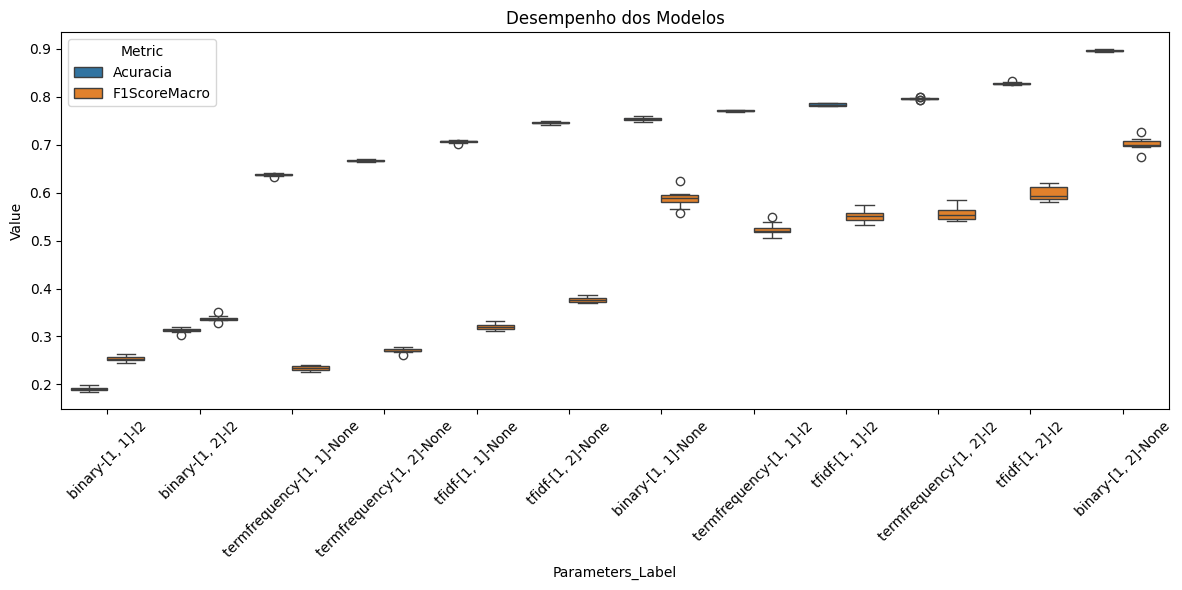

In [196]:
# Gera boxplot
filters = {'Parameters_label': []}  # Exemplo de filtro
metrics = ['Acuracia', 'F1ScoreMacro']  # Métricas para o boxplot
visualizer.generate_boxplot(filters=filters, metrics=metrics, title='Desempenho dos Modelos', sort_by='Acuracia')

In [198]:
metric = 'Acuracia'  # Especifique a métrica para a qual você deseja aplicar ANOVA
anova_results, coeffs = visualizer.apply_anova2(metric=metric,interaction_level=1)
display(anova_results)
display(coeffs)

,sum_sq,df,F,PR(>F)
C(method),1.153255,2.0,21.091199,1.573624e-08
C(ngram_range),0.135480,1.0,4.955412,2.795819e-02
C(norm),0.435794,1.0,15.939972,1.155638e-04
Residual,3.144067,115.0,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Acuracia   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     15.77
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           2.57e-10
Time:                        16:42:32   Log-Likelihood:                 48.246
No. Observations:                 120   AIC:                            -86.49
Df Residuals:                     115   BIC:                            -72.55
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.5648      0.034     16.733      0.000       0.498       0.632
C(method)[T.termfrequency]     0.1798      0.037      4.862      0.000       0.107       0.253
C(method)[T.tfidf]             0.2278      0.037      6.160      0.000       0.155       0.301
C(ngram_range)[T.1-2]          0.0672      0.030      2.226      0.028       0.007       0.127
C(norm)[T.l2]                 -0.1205      0.030     -3.992      0.000      -0.180      -0.061
==============================================================================
Omnibus:                      118.766   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.462
Skew:                           0.017   Prob(JB):                      0.00882
Kurtosis:                       1.625   Cond. No.                         4.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d:\Nuvem\ghdaru\OneDrive\030_DOUTORADO\460_MECAI\110_CODIGOS\Artigo Semina\prodclass\notebooks\..\utils\result_visualizer.py:257: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  scatter = sns.scatterplot(data=stats_df, x='Acuracia mean', y='F1ScoreMacro mean',


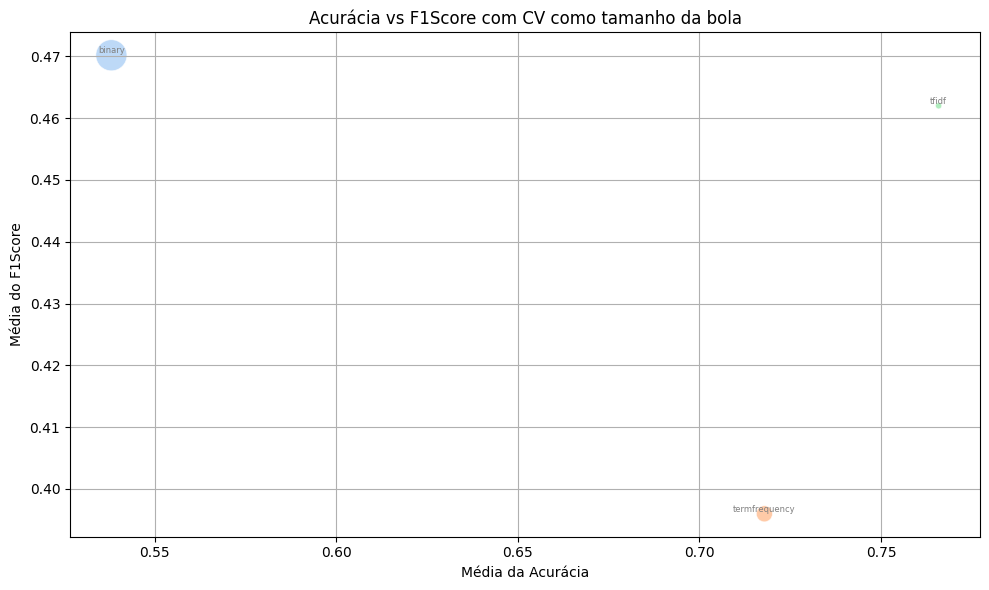

,Experimento,Projeto,method,Acuracia mean,Acuracia std,F1ScoreMacro mean,F1ScoreMacro std,Acuracia cv,F1ScoreMacro cv,Labels,bubble_size
0,Argmax,Artigo,binary,0.538095,0.297605,0.470180,0.183821,55.307235,39.095852,binary,4720.154359
1,Argmax,Artigo,termfrequency,0.717875,0.067988,0.395974,0.146583,9.470787,37.018425,termfrequency,2324.460582
2,Argmax,Artigo,tfidf,0.765849,0.045539,0.462001,0.117960,5.946168,25.532402,tfidf,1573.928471


In [199]:
filters = {"method":[]}  # Exemplo de filtro
visualizer.plot_acuracy_vs_f1score(filters)
visualizer.stats_df

d:\Nuvem\ghdaru\OneDrive\030_DOUTORADO\460_MECAI\110_CODIGOS\Artigo Semina\prodclass\notebooks\..\utils\result_visualizer.py:257: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  scatter = sns.scatterplot(data=stats_df, x='Acuracia mean', y='F1ScoreMacro mean',


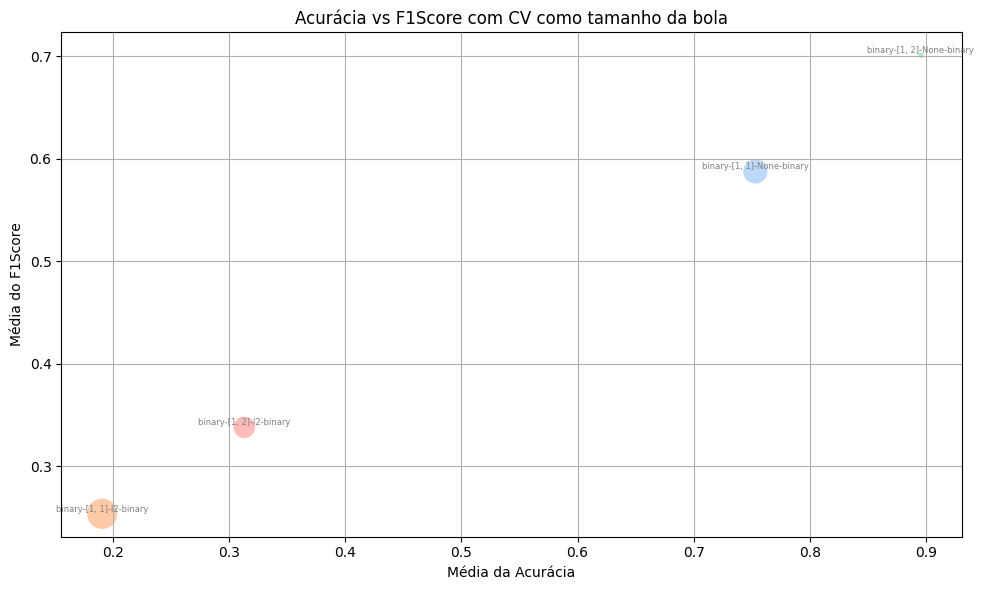

,Experimento,Projeto,Parameters_Label,method,Acuracia mean,Acuracia std,F1ScoreMacro mean,F1ScoreMacro std,Acuracia cv,F1ScoreMacro cv,Labels,bubble_size
0,Argmax,Artigo,"binary-[1, 1]-None",binary,0.753092,0.003339,0.587712,0.018489,0.443435,3.145849,"binary-[1, 1]-None-binary",179.464150
1,Argmax,Artigo,"binary-[1, 1]-l2",binary,0.190686,0.004569,0.253889,0.005175,2.396068,2.038462,"binary-[1, 1]-l2-binary",221.726486
2,Argmax,Artigo,"binary-[1, 2]-None",binary,0.895577,0.001862,0.700921,0.013354,0.207912,1.905186,"binary-[1, 2]-None-binary",105.654923
3,Argmax,Artigo,"binary-[1, 2]-l2",binary,0.313024,0.004631,0.338196,0.005975,1.479487,1.766763,"binary-[1, 2]-l2-binary",162.312468


In [201]:
filters = {"Parameters_Label":[], "method":["binary"]}  # Exemplo de filtro
visualizer.plot_acuracy_vs_f1score(filters)
visualizer.stats_df